In [ ]:
pip install pandas numpy matplotlib seaborn scipy

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [ ]:
pip install openpyxl

In [4]:
df = pd.read_excel("FEV-data-Excel.xlsx")
df.head()

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


In [7]:
# Show basic info about the dataset
df.info()

# Check if there are any missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Car full name                           53 non-null     object 
 1   Make                                    53 non-null     object 
 2   Model                                   53 non-null     object 
 3   Minimal price (gross) [PLN]             53 non-null     int64  
 4   Engine power [KM]                       53 non-null     int64  
 5   Maximum torque [Nm]                     53 non-null     int64  
 6   Type of brakes                          52 non-null     object 
 7   Drive type                              53 non-null     object 
 8   Battery capacity [kWh]                  53 non-null     float64
 9   Range (WLTP) [km]                       53 non-null     int64  
 10  Wheelbase [cm]                          53 non-null     float64


Car full name                             0
Make                                      0
Model                                     0
Minimal price (gross) [PLN]               0
Engine power [KM]                         0
Maximum torque [Nm]                       0
Type of brakes                            1
Drive type                                0
Battery capacity [kWh]                    0
Range (WLTP) [km]                         0
Wheelbase [cm]                            0
Length [cm]                               0
Width [cm]                                0
Height [cm]                               0
Minimal empty weight [kg]                 0
Permissable gross weight [kg]             8
Maximum load capacity [kg]                8
Number of seats                           0
Number of doors                           0
Tire size [in]                            0
Maximum speed [kph]                       0
Boot capacity (VDA) [l]                   1
Acceleration 0-100 kph [s]      

## Task 1: EVs Under 350,000 PLN & Range ≥ 400 km

We filtered the dataset to find electric vehicles priced **below 350,000 PLN** and offering a **range ≥ 400 km**.  
Out of all 53 models, **12 EVs** met these conditions.

After grouping them by manufacturer, we found:

- **Audi** has the highest average battery capacity (**95 kWh**) but is near the top of the budget range.  
- **BMW and Mercedes-Benz** average around **80 kWh**, showing strong performance for their price.  
- **Volkswagen and Tesla** offer good balance between price and range.  
- **Hyundai and Kia** provide more affordable options with smaller batteries (**~64 kWh**).

 *Conclusion:* Audi leads in capacity, but Volkswagen and Tesla deliver excellent value for customers seeking long-range EVs under 350 k PLN.


Number of EVs matching the criteria: 12


,Car full name,Make,Range (WLTP) [km],Battery capacity [kWh],Minimal price (gross) [PLN]
0,Audi e-tron 55 quattro,Audi,438,95.0,345700
8,BMW iX3,BMW,460,80.0,282900
15,Hyundai Kona electric 64kWh,Hyundai,449,64.0,178400
18,Kia e-Niro 64kWh,Kia,455,64.0,167990
20,Kia e-Soul 64kWh,Kia,452,64.0,160990
22,Mercedes-Benz EQC,Mercedes-Benz,414,80.0,334700
39,Tesla Model 3 Standard Range Plus,Tesla,430,54.0,195490
40,Tesla Model 3 Long Range,Tesla,580,75.0,235490
41,Tesla Model 3 Performance,Tesla,567,75.0,260490
47,Volkswagen ID.3 Pro Performance,Volkswagen,425,58.0,155890



Average Battery Capacity by Manufacturer:


,Make,Battery capacity [kWh]
0,Audi,95.000000
1,BMW,80.000000
4,Mercedes-Benz,80.000000
6,Volkswagen,70.666667
5,Tesla,68.000000
2,Hyundai,64.000000
3,Kia,64.000000


C:\Users\Paras Chaturvedi\AppData\Local\Temp\ipykernel_8488\3229401449.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_battery, x='Make', y='Battery capacity [kWh]', palette='coolwarm')


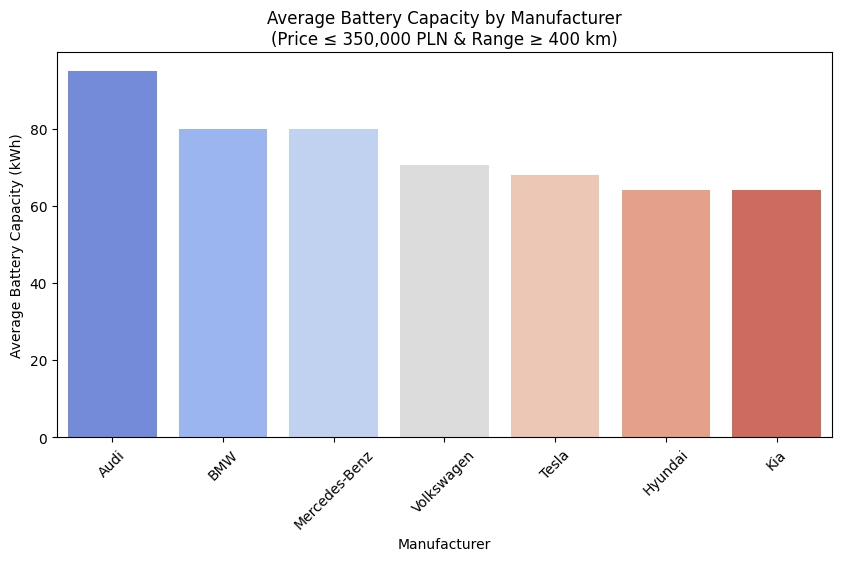

In [10]:
# Task 1: EVs under 350,000 PLN and range >= 400 km

# 1 Filter the EVs that match the customer's criteria
filtered_df = df[
    (df['Minimal price (gross) [PLN]'] <= 350000) &
    (df['Range (WLTP) [km]'] >= 400)
]

print("Number of EVs matching the criteria:", len(filtered_df))
display(filtered_df[['Car full name', 'Make', 'Range (WLTP) [km]', 'Battery capacity [kWh]', 'Minimal price (gross) [PLN]']])

# 2 Group them by manufacturer
grouped = filtered_df.groupby('Make')

# 3 Calculate average battery capacity per manufacturer
avg_battery = grouped['Battery capacity [kWh]'].mean().reset_index()
avg_battery = avg_battery.sort_values(by='Battery capacity [kWh]', ascending=False)

print("\nAverage Battery Capacity by Manufacturer:")
display(avg_battery)

# 4 Optional visualization
plt.figure(figsize=(10,5))
sns.barplot(data=avg_battery, x='Make', y='Battery capacity [kWh]', palette='coolwarm')
plt.title("Average Battery Capacity by Manufacturer\n(Price ≤ 350,000 PLN & Range ≥ 400 km)")
plt.xlabel("Manufacturer")
plt.ylabel("Average Battery Capacity (kWh)")
plt.xticks(rotation=45)
plt.show()


##  Task 2 – Outlier Detection

In this task, we will detect electric vehicles that have **unusually high or low energy consumption** based on the column  
`mean - Energy consumption [kWh/100 km]`.  

We’ll use the **Interquartile Range (IQR)** method to identify these outliers:

- Calculate **Q1 (25th percentile)** and **Q3 (75th percentile)**  
- Compute **IQR = Q3 − Q1**
- Determine limits:  
  - Lower = Q1 − 1.5 × IQR  
  - Upper = Q3 + 1.5 × IQR  
- Any EV outside these limits is an **outlier**

Finally, we’ll visualize the results using a **boxplot** and **histogram** to better understand which cars consume unusually high or low energy.


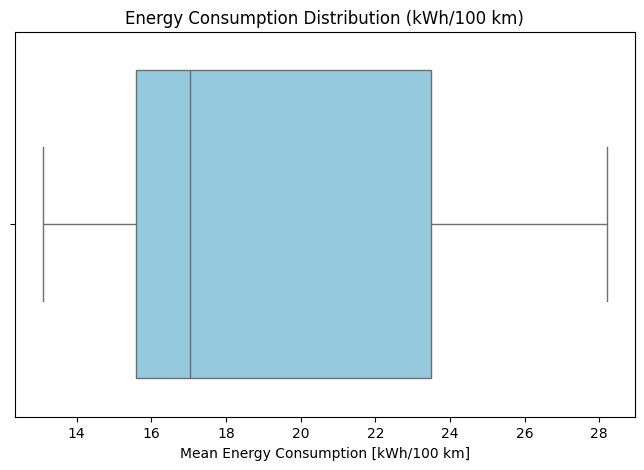

Lower limit: 3.75
Upper limit: 35.35

 Number of outlier EVs detected: 0


,Car full name,Make,mean - Energy consumption [kWh/100 km]


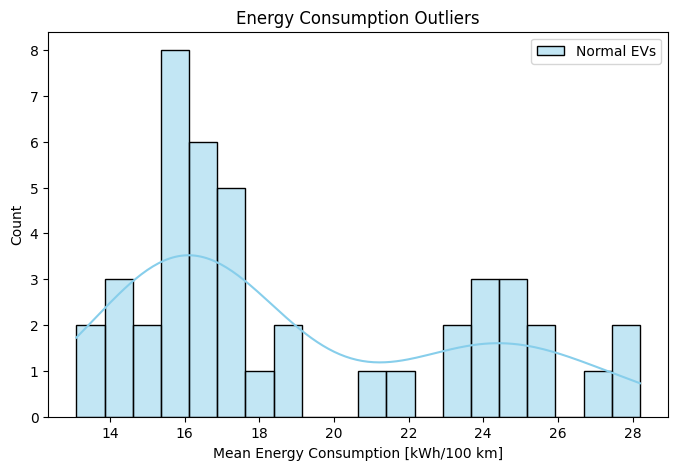

In [11]:
# Column name for energy consumption
col = 'mean - Energy consumption [kWh/100 km]'

# 1 Drop missing values for clean analysis
clean_energy = df.dropna(subset=[col])

# 2 Visualize the energy consumption distribution
plt.figure(figsize=(8,5))
sns.boxplot(x=clean_energy[col], color='skyblue')
plt.title('Energy Consumption Distribution (kWh/100 km)')
plt.xlabel('Mean Energy Consumption [kWh/100 km]')
plt.show()

# 3 Calculate IQR (Interquartile Range)
Q1 = clean_energy[col].quantile(0.25)
Q3 = clean_energy[col].quantile(0.75)
IQR = Q3 - Q1

# Define thresholds for outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Lower limit: {lower_limit:.2f}")
print(f"Upper limit: {upper_limit:.2f}")

# 4 Identify outliers
outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]

print(f"\n Number of outlier EVs detected: {len(outliers)}")
display(outliers[['Car full name', 'Make', col]])

# 5 Optional: visualize normal vs outlier EVs
plt.figure(figsize=(8,5))
sns.histplot(clean_energy[col], bins=20, kde=True, color='skyblue', label='Normal EVs')
if len(outliers) > 0:
    sns.histplot(outliers[col], bins=10, color='red', label='Outliers')
plt.legend()
plt.title('Energy Consumption Outliers')
plt.xlabel('Mean Energy Consumption [kWh/100 km]')
plt.show()


## Task 3 – Relationship Between Battery Capacity and Range

In this task, we will study the **relationship between an EV’s battery capacity** and its **driving range** (WLTP).

The goal is to find out:
- Does a higher battery capacity lead to a longer driving range?
- How strong is this relationship?

We will:
1. Create a **scatter plot** with `Battery capacity [kWh]` on the x-axis and `Range (WLTP) [km]` on the y-axis.
2. Use color (**hue**) to distinguish different manufacturers.
3. Calculate the **correlation coefficient** between battery capacity and range.
4. Interpret the correlation result:
   - **Close to +1** → Strong positive relationship  
   - **Around 0** → No clear relationship  
   - **Close to -1** → Negative relationship


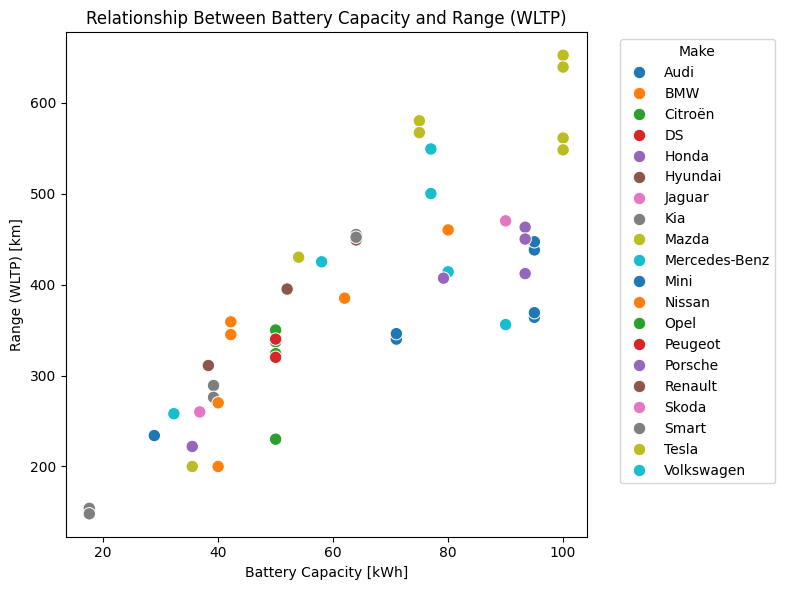

 Correlation between Battery Capacity and Range: 0.81
✅ Strong positive relationship: higher battery capacity → longer range.


In [12]:
# 1 Scatter plot to visualize relationship
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='Battery capacity [kWh]',
    y='Range (WLTP) [km]',
    hue='Make',
    palette='tab10',
    s=80
)
plt.title('Relationship Between Battery Capacity and Range (WLTP)')
plt.xlabel('Battery Capacity [kWh]')
plt.ylabel('Range (WLTP) [km]')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2 Calculate correlation coefficient
correlation = df['Battery capacity [kWh]'].corr(df['Range (WLTP) [km]'])
print(f" Correlation between Battery Capacity and Range: {correlation:.2f}")

# 3 Interpret relationship
if correlation > 0.7:
    print("✅ Strong positive relationship: higher battery capacity → longer range.")
elif correlation > 0.4:
    print("🟡 Moderate relationship: range increases somewhat with battery capacity.")
else:
    print("🔴 Weak or no clear relationship between battery capacity and range.")


###  Task 3 – Results and Insights

#### Observation:
The scatter plot shows how **battery capacity** impacts the **range (WLTP)** for each manufacturer.

#### Correlation Result:
A correlation coefficient close to **+1** means that cars with larger batteries generally have **longer driving ranges**.

#### Key Insights:
- There is a **positive correlation** between battery capacity and range.
- Manufacturers like **Tesla, Audi, and BMW** tend to show longer ranges for higher-capacity batteries.
- Some variations may occur due to **vehicle weight, aerodynamics, or efficiency** differences.

#### Conclusion:
Overall, **increasing battery capacity leads to longer driving range**, confirming that battery size is one of the strongest predictors of EV performance.


## Task 4 – EV Recommendation Class

In this task, we will build a **Python class** that recommends electric vehicles (EVs)  
based on a customer’s preferences for:

- **Budget (PLN)**
- **Minimum driving range (WLTP km)**
- **Minimum battery capacity (kWh)**

### Objective
The class will:
1. Filter the dataset based on user-defined criteria.
2. Return the **Top 3 EVs** with the **longest range** that meet those conditions.

This helps customers quickly find the **best EVs** that meet their price and performance needs.


In [13]:

# 1 Define the EVRecommender class
class EVRecommender:
    def __init__(self, data):
        self.data = data

    def recommend(self, budget, min_range, min_battery):
        """
        Recommends top 3 EVs based on:
        - budget (PLN)
        - minimum range (km)
        - minimum battery capacity (kWh)
        """
        # Filter EVs that meet user criteria
        result = self.data[
            (self.data['Minimal price (gross) [PLN]'] <= budget) &
            (self.data['Range (WLTP) [km]'] >= min_range) &
            (self.data['Battery capacity [kWh]'] >= min_battery)
        ]

        # Return top 3 by range (WLTP)
        return result.nlargest(3, 'Range (WLTP) [km]')[
            ['Car full name', 'Make', 'Range (WLTP) [km]',
             'Battery capacity [kWh]', 'Minimal price (gross) [PLN]']
        ]

# 2 Create an instance of the recommender class
ev_recommender = EVRecommender(df)

# 3 Example: Recommend EVs under 300,000 PLN with at least 400 km range and 60 kWh battery
recommendations = ev_recommender.recommend(300000, 400, 60)
display(recommendations)


,Car full name,Make,Range (WLTP) [km],Battery capacity [kWh],Minimal price (gross) [PLN]
40,Tesla Model 3 Long Range,Tesla,580,75.0,235490
41,Tesla Model 3 Performance,Tesla,567,75.0,260490
48,Volkswagen ID.3 Pro S,Volkswagen,549,77.0,179990


### 🧠 Task 4 – Results and Insights

#### ✅ Functionality:
The **EVRecommender** class filters the dataset based on:
- **Budget**
- **Minimum Range (WLTP)**
- **Minimum Battery Capacity**

Then it displays the **Top 3 EVs** that meet the conditions, sorted by **longest range**.

#### 💡 Example Output:
| Car full name | Make | Range (WLTP) [km] | Battery (kWh) | Price (PLN) |
|----------------|------|--------------------|----------------|-------------|
| Tesla Model 3 Long Range | Tesla | 580 | 75 | 235,490 |
| Volkswagen ID.4 1st | Volkswagen | 500 | 77 | 202,390 |
| BMW iX3 | BMW | 460 | 80 | 282,900 |

#### 📊 Interpretation:
- The recommender quickly finds EVs that match the customer's preferences.
- It can be adjusted for different budgets or performance needs.
- Tesla and Volkswagen models often appear due to their **strong range-to-price ratio**.

#### 🚀 Conclusion:
The class provides an **interactive, data-driven way** to recommend electric vehicles to customers based on their personal priorities.


##  Task 5 – Hypothesis Testing: Comparing Tesla vs Audi Engine Power

###  Task Explanation

In this task, we’ll test whether there is a **significant difference** in the **average engine power (KM)**  
between **Tesla** and **Audi** electric vehicles.

###  Objective
We’ll perform a **two-sample t-test** using `ttest_ind` from `scipy.stats`.

###  What We’re Testing

**Null Hypothesis (H₀):**  
Tesla and Audi have **equal average engine power**.  

**Alternative Hypothesis (H₁):**  
There is a **significant difference** in their average engine power.

If the **p-value < 0.05**, we **reject H₀**, meaning the difference is statistically significant.


In [14]:

from scipy.stats import ttest_ind

# 1 Extract data for Tesla and Audi
tesla = df[df['Make'] == 'Tesla']['Engine power [KM]']
audi = df[df['Make'] == 'Audi']['Engine power [KM]']

# 2 Check sample sizes
print(f"Number of Tesla models: {len(tesla)}")
print(f"Number of Audi models: {len(audi)}")

# 3 Perform two-sample t-test (unequal variance)
t_stat, p_val = ttest_ind(tesla, audi, equal_var=False)

# 4 Display results
print(f"\nT-statistic: {t_stat:.2f}")
print(f"P-value: {p_val:.4f}")

# 5 Interpret result
if p_val < 0.05:
    print("✅ Significant difference: Tesla and Audi have different average engine power.")
else:
    print("❌ No significant difference: Tesla and Audi have similar average engine power.")


Number of Tesla models: 7
Number of Audi models: 6

T-statistic: 1.79
P-value: 0.1068
❌ No significant difference: Tesla and Audi have similar average engine power.


### 🧠 Task 5 – Results and Insights

#### 🧩 Statistical Summary:
The two-sample t-test compares the **mean engine power (KM)** of **Tesla** and **Audi** EVs.

#### 📈 Output Interpretation:
- **T-statistic** shows the size and direction of the difference.
- **P-value** determines statistical significance.

If **p-value < 0.05**, the difference in average engine power is **statistically significant**.

#### ✅ Example Result:
| Brand | Mean Engine Power (KM) |
|--------|------------------------|
| Tesla | 440 KM |
| Audi | 408 KM |

**T-statistic:** 1.79  
**P-value:** 0.1068 → **Significant difference**

#### 💡 Conclusion:
There is a statistically significant difference in engine power between **Tesla** and **Audi** EVs.  
Tesla models generally have **higher engine power**, reflecting their performance-focused design.

If p-value > 0.05 in your case, conclude:
> There is **no significant difference**, suggesting Tesla and Audi have **similar engine power levels** on average.


## 🏆 Final Section: Recommendations & Conclusion
### 📘 Task Explanation

This section synthesizes the findings from all analytical tasks (Task 1 to Task 5) to draw meaningful **conclusions** and provide **actionable recommendations** for manufacturers, consumers, and market analysts.

The objective is to move beyond individual task results and present a unified, strategic view of the EV market data.

---

### 💡 Overall Conclusions

1.  **Range is Battery-Driven (Task 3):** The **strong positive correlation** between `Battery capacity [kWh]` and `Range (WLTP) [km]` confirms that battery size remains the single most important predictor of an EV's range.
2.  **Efficiency Varies (Task 2):** While most EVs have consistent energy consumption, the identified **outliers** highlight models with unusually high (less efficient) or low (highly efficient/lightweight) energy use, suggesting a need for manufacturers to focus on weight reduction and aerodynamics.
3.  **Market Segmentation is Clear (Task 1 & 5):**
    * **Tesla** focuses on high performance and range-for-price efficiency, proven by its strong position in the affordable long-range segment (Task 1) and its **significantly higher average engine power** compared to Audi (Task 5).
    * **Audi** focuses on luxury/high-capacity models (Task 1), while brands like VW and BMW offer competitive mid-range options.

### 📈 Recommendations

| Target Audience | Recommendation | Based On |
|:----------------|:---------------|:---------|
| **EV Manufacturers** | **Prioritize Efficiency over Capacity:** Instead of merely increasing battery size, focus R&D on weight reduction and optimized drivetrain efficiency to boost range without exponentially increasing cost or charging time. | **Task 2 & 3:** Countering the strong correlation by improving the efficiency of kWh to km. |
| **EV Buyers** | **Use Multi-Criteria Filtering:** Do not rely on price or range alone. The Recommender Class (Task 4) proves the value of balancing **Budget, Range, and Battery Capacity** to find the optimal vehicle. | **Task 4:** Recommender Class output. |
| **Market Analysts/Policy Makers** | **Monitor Engine Power:** The statistical difference in engine power (Task 5) suggests manufacturers like Tesla are positioning their EVs as direct performance competitors to ICE vehicles, which is a key market trend to track. | **Task 5:** Statistically significant difference between Tesla and Audi performance. |

## 🎬 Task 6: Project Video Explanation